# Crop Production In India

<img src = "https://www.shutterstock.com/image-photo/corn-cobs-plantation-field-260nw-2219335147.jpg" width = 1190>

This project analyzes India's crop production trends from 1997 to 2015 using Python.<br>
It highlights top states, crops, and seasons, providing insights to improve farming practices. The goal is to support better decisions for boosting agricultural productivity make it easy to understand. 


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv(r"/kaggle/input/crop-production-in-india/crop_production.csv")

In [91]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [93]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [94]:
df.nunique()

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38442
Production       51627
dtype: int64

In [95]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [96]:
df.dropna(how = "any",inplace  = True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


In [98]:
df.describe(include = "object")

,State_Name,District_Name,Season,Crop
count,242361,242361,242361,242361
unique,33,646,6,124
top,Uttar Pradesh,TUMKUR,Kharif,Rice
freq,33189,931,94283,15082


In [99]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [100]:
df.Crop.value_counts()

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: count, Length: 124, dtype: int64

In [101]:
#yearly growth in production by state_wise 
yearly_production = df.groupby("Crop_Year").agg({"Production":"sum"}).sort_values("Production",ascending = False)
                                                                                 

In [102]:
yearly_production

,Production
Crop_Year,
2011,1.430890e+10
2013,1.290359e+10
2006,8.681913e+09
2014,8.664541e+09
2004,8.189462e+09
2012,8.171055e+09
2005,8.043757e+09
2003,7.917974e+09
2008,7.717018e+09


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Crop_Year', ylabel='Production'>

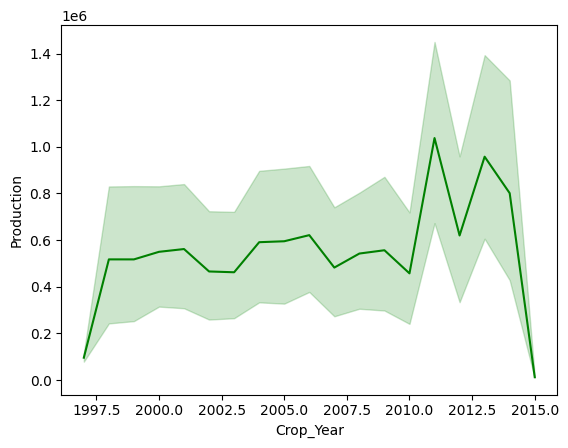

In [103]:
sns.lineplot(x = df["Crop_Year"],y = df["Production"],color = "green")

In 2011, crop production was very high, maybe because of good weather, better farming methods, or more investments. In 1997, production was lower, likely due to bad weather or other difficulties.<br>
There is also a fluctuation in production each year, with varying highs and lows.

In [104]:
seasonality = df.groupby(["Season"]).agg({"Production":"sum"}).sort_values("Production",ascending = False)

In [105]:
seasonality

,Production
Season,
Whole Year,1.344248e+11
Kharif,4.029970e+09
Rabi,2.051688e+09
Winter,4.345498e+08
Summer,1.706579e+08
Autumn,6.441377e+07


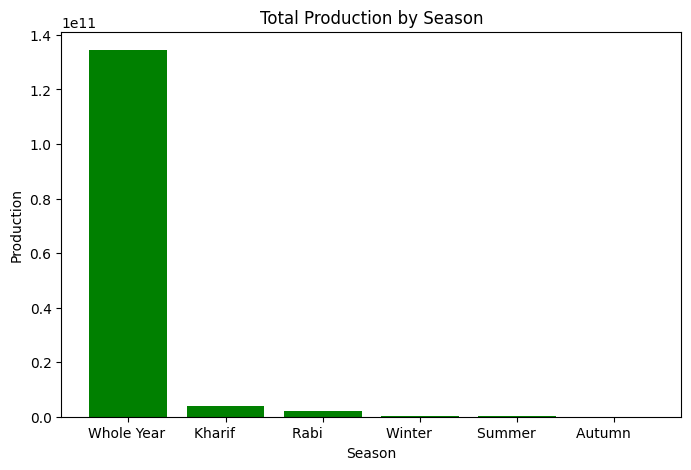

In [106]:
plt.figure(figsize=(8, 5))
plt.bar(seasonality.index, seasonality['Production'], color='green')
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Total Production by Season')
plt.show()

Whole Year crops produce the most, followed by Kharif and Rabi seasons. Winter, Summer, and Autumn produce much less, with Autumn being the lowest.

In [107]:
# this The top perfroming states

In [108]:
df.groupby("State_Name").agg({"Production":"mean"}).sort_values("Production",ascending = False).head()

,Production
State_Name,
Kerala,2.445167e+07
Andaman and Nicobar Islands,3.573250e+06
Goa,2.443265e+06
Andhra Pradesh,1.812006e+06
Tamil Nadu,9.103304e+05


In [109]:
df.groupby("Crop").agg({"Production":"mean"}).sort_values("Production",ascending = False).head()

,Production
Crop,
Coconut,6.638490e+07
Sugarcane,7.072546e+05
Total foodgrain,2.301636e+05
Wheat,1.691833e+05
Jute,1.289476e+05


In [110]:
df["Crop"].value_counts().head()

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: count, dtype: int64

here we can see that Rice and Maize are the most produced crops, while sesamum has the lowest production among the top crops. This shows that rice, maize, pulses, and oilseeds are important in farming.

## Rice

In [111]:
df_rice = df.query("Crop == 'Rice'")

In [112]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15082 entries, 2 to 246089
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     15082 non-null  object 
 1   District_Name  15082 non-null  object 
 2   Crop_Year      15082 non-null  int64  
 3   Season         15082 non-null  object 
 4   Crop           15082 non-null  object 
 5   Area           15082 non-null  float64
 6   Production     15082 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 942.6+ KB


In [113]:
rice_seasonality = df_rice.groupby("Season").agg({"Production":"mean"}).sort_values("Production",ascending = False)

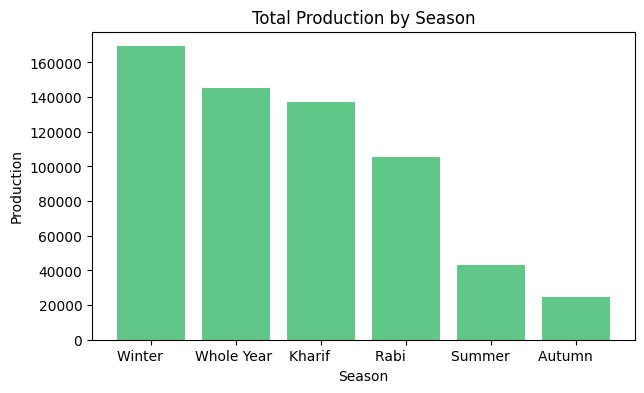

In [114]:
plt.figure(figsize=(7, 4))
plt.bar(rice_seasonality.index, rice_seasonality['Production'], color='#61c788')
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Total Production by Season')
plt.show()

It shows that which seasons work best for rice growth.
Winter season has the highest rice production, showing it's the best time for growing rice.<br> Other seasons have lower production, meaning the conditions might not be as good for rice farming. 

In [115]:
df_rice_States = df_rice.groupby("State_Name").agg({"Production":"mean"})

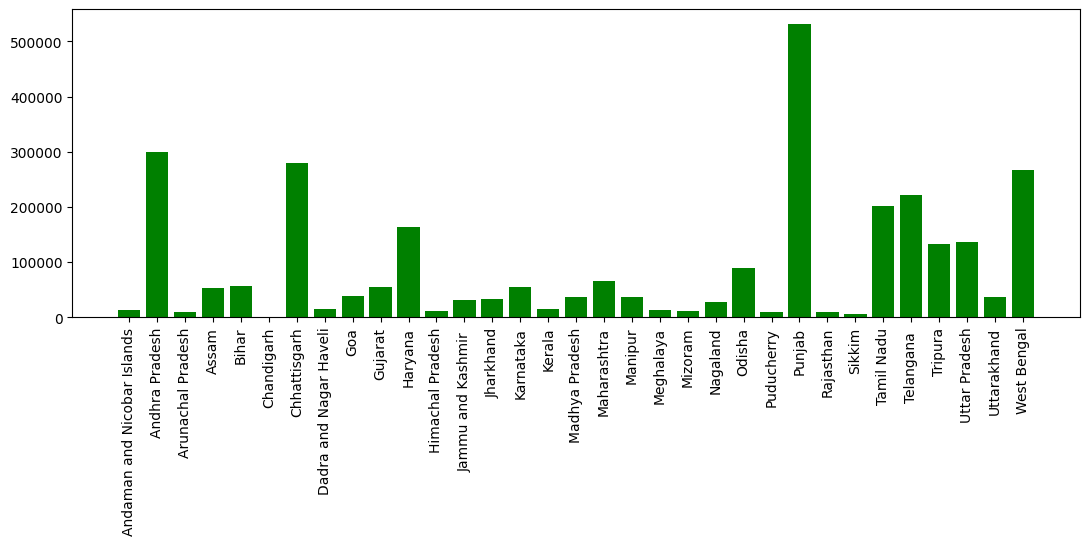

In [116]:
plt.figure(figsize=(13, 4))
plt.bar(df_rice_States.index,df_rice_States["Production"],color = "green")
plt.xticks(rotation=90)
plt.show()

The chart shows that Punjab, Andhra Pradesh, and Chhattisgarh are the top rice producers in India. These states have favorable conditions and strong farming practices for rice cultivation.

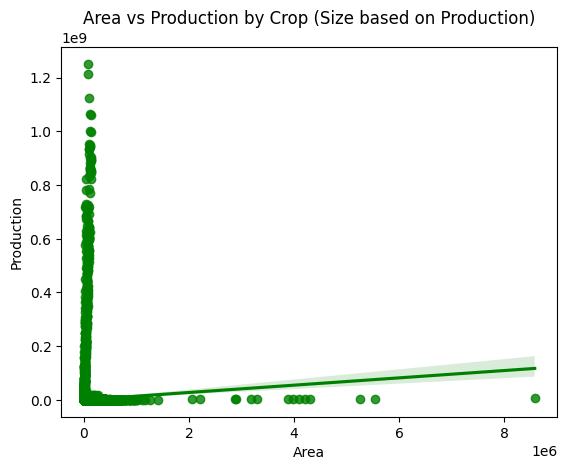

In [117]:
sns.regplot(data=df, x="Area", y="Production",color = "green")

# Adding titles and labels for clarity
plt.title('Area vs Production by Crop (Size based on Production)')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()


In [118]:
df_rice_ = df_rice.loc[:,["Area","Production"]].sort_values("Production",ascending = False)

In [119]:
df_rice_

,Area,Production
164232,367000.0,1710000.0
164259,362000.0,1637000.0
164245,367000.0,1625000.0
9830,409286.0,1624324.0
164219,366000.0,1566000.0
...,...,...
168858,1.0,1.0
14096,9865.0,0.0
19030,2100.0,0.0
70054,343.0,0.0


Bigger areas usually produce more rice, as expected. However, some areas show very low or no production, even when land is available. This could be due to farming problems or errors in the data. Smaller areas often have less production, which is normal.

### Maize

In [120]:
df_maize = df.query("Crop == 'Maize'")

In [121]:
df_maize.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13787 entries, 71 to 246085
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     13787 non-null  object 
 1   District_Name  13787 non-null  object 
 2   Crop_Year      13787 non-null  int64  
 3   Season         13787 non-null  object 
 4   Crop           13787 non-null  object 
 5   Area           13787 non-null  float64
 6   Production     13787 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 861.7+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


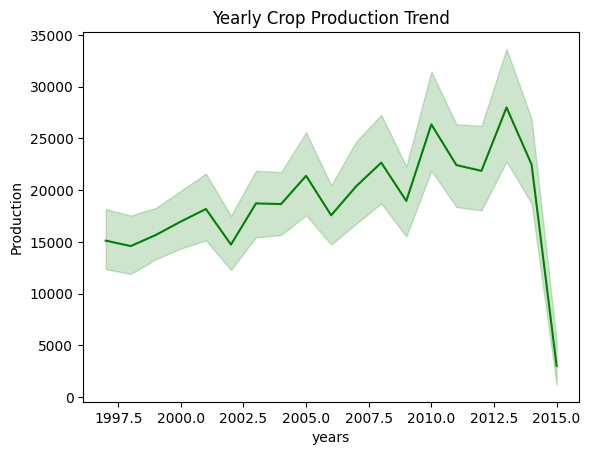

In [122]:
sns.lineplot(data = df_maize,x = "Crop_Year",y = "Production",color = "green")
plt.xlabel("years")
plt.ylabel("Production")
plt.title("Yearly Crop Production Trend")
plt.show()

In [123]:
Top_maize_states = df_maize.groupby("State_Name").agg({"Production":"sum"})

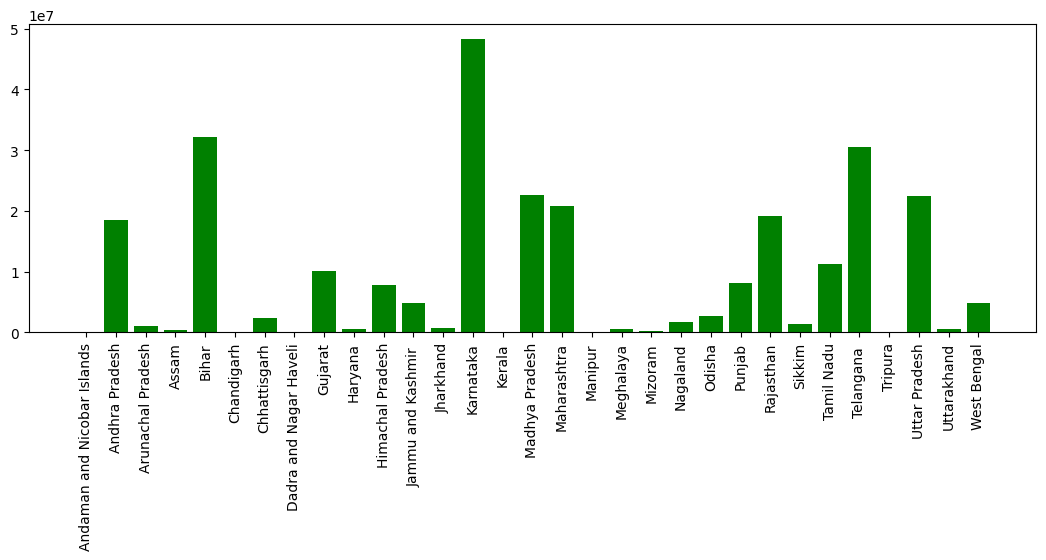

In [124]:
plt.figure(figsize=(13, 4))
plt.bar(Top_maize_states.index,Top_maize_states["Production"],color = "green")
plt.xticks(rotation = 90)
plt.show()

Karnataka grows the most maize, then Telangana and Bihar.
These states have good conditions for maize.Other states grow less maize, maybe because they focus on other crops or don’t have the best conditions.
States with low production can grow more maize if they improve farming.

In [125]:
# top states who has maximum maize production

In [126]:
maize_seasonality = df_maize.groupby("Season").agg({"Production":"sum"}).sort_values("Production",ascending = False)

In [127]:
maize_seasonality

,Production
Season,
Kharif,1.965474e+08
Rabi,4.789535e+07
Summer,1.392421e+07
Autumn,8.933034e+06
Whole Year,5.987633e+06
Winter,5.412830e+04


Kharif is the best season for maize, and Rabi also has good production, but not as much as Kharif. while Winter is the worst.

In [128]:
maize_district = df_maize.groupby("District_Name").agg({"Production":"sum"}).sort_values("Production",ascending = False).head()

In [129]:
maize_district["percentage"] = (maize_district["Production"] / maize_district["Production"].sum()) * 100

In [130]:
maize_district = maize_district.reset_index()

In [131]:
maize_district

,District_Name,Production,percentage
0,KARIMNAGAR,8320331.0,24.023900
1,DAVANGERE,7496490.0,21.645164
2,BELGAUM,6739811.0,19.460349
3,GUNTUR,6607226.0,19.077527
4,HAVERI,5469698.0,15.793059


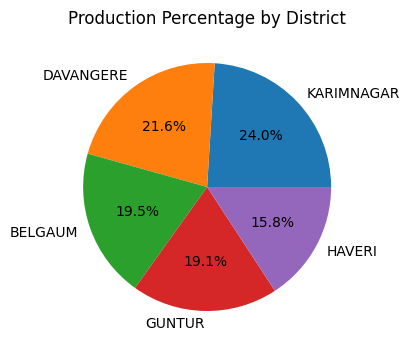

In [132]:
plt.figure(figsize = (4,5))
plt.pie(maize_district['percentage'], labels = maize_district['District_Name'], autopct='%1.1f%%')
plt.title("Production Percentage by District")
plt.show()

Karimnagar, Davangere, and Belgaum are the biggest producers of maize, meaning they are very important for maize farming.
Other districts like Guntur and Haveri also produce maize, but not as much.
By focusing on the top-producing districts, we can help improve maize farming in these areas.

## Recommendations

We can help farmers by teaching them how to farm in a way that protects the environment, encouraging them to grow different crops to reduce risk, and using new tools like drones to make farming easier. Planting at the right time and focusing on important areas can lead to better crop production. <br>Also, research and using data can help farmers make smarter choices for better results.